<a href="https://colab.research.google.com/github/Z4phxr/Linear-Regression-Study/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sklearn

# Testing sklearn linear regression model


In [86]:
x1 = []
y = []
with open("data1.csv", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        x1.append(float(row[0]))
        y.append(float(row[1]))

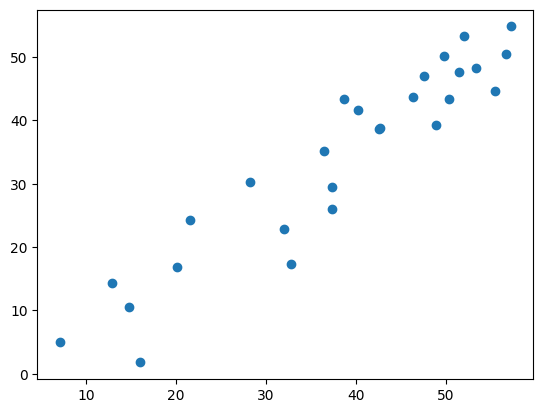

In [87]:
plt.scatter(x1, y)

In [88]:
x = [[el] for el in x1]

In [89]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=1)

In [90]:
lr = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [91]:
lr.score(X_train, y_train)

0.8884527429223392

In [92]:
lr.score(X_test, y_test)

0.7901827914959503

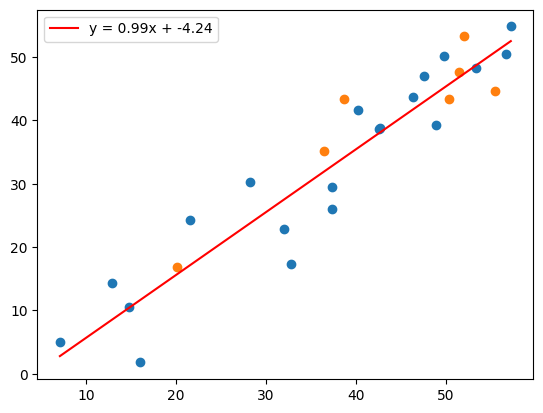

In [93]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

a = lr.coef_[0]
b = lr.intercept_

x_all = np.array(x) if not isinstance(x, np.ndarray) else x

x_line = np.linspace(x_all.min(), x_all.max(), 100)
y_line = a * x_line + b

plt.plot(x_line, y_line, color='red', label=f'y = {a:.2f}x + {b:.2f}')
plt.legend()
plt.show()


# Building my own linear regression model

The model is based on the equation $ y = X \beta + \epsilon $, where $ y $ is the target vector, $ X $ is the feature matrix with each row as a data point and columns as features (including a column of ones for the intercept), $ \beta $ is the vector of coefficients (intercept $ \beta_0 $ and feature weights $ \beta_1, \beta_2, \dots $), and $ \epsilon $ is the error term capturing noise or unmodeled factors. The goal is to find $ \beta $ that minimizes the squared errors.

We need to calculate the value of the vector **β**, which can be done using the formula:

$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$

Construct **X** with shape **(n, m+1)**, where **n** is the number of samples and **m** is the number of features, including a column of ones for the intercept.  

To compute **β** using matrix operations:  
1. Transpose: **Xᵀ**  
2. Matrix product: **Xᵀ X**  
3. Inverse: **(Xᵀ X)⁻¹**  
4. Final product: **(Xᵀ X)⁻¹ Xᵀ y**  

This is done by the **fit** function, which computes and stores the intercept and coefficients.


The `predict` function takes new input data **X**, adds a column of ones to maintain the same format as during training, and computes predictions using:

$$
\hat{y} = X \boldsymbol{\beta}
$$

where **β** is the concatenated vector of the intercept and coefficients, using matrix multiplication (NumPy’s `@` operator).  

Evaluate the model with metrics like **Mean Squared Error (MSE)** and **R²** to assess prediction accuracy.  

Ensure data quality to avoid issues like a non-invertible \(X^T X\), using a pseudo-inverse or gradient descent if needed.


The `score` function in linear regression returns the **R² score**, which shows how well the model explains the variance in the data. It compares prediction errors (**SSE**) to the total variance (**SST**) using:

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

Values near **1** indicate a good fit, **0** means no improvement over predicting the mean, and negative values indicate a poor model.


In [94]:
class MyLinear_Regression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
        X_T_X = X_with_intercept.T @ X_with_intercept
        X_T_X_inv = np.linalg.inv(X_T_X)
        beta = X_T_X_inv @ X_with_intercept.T @ y
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, X):
        X = np.array(X)
        X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
        beta = np.concatenate([[self.intercept_], self.coef_])
        return X_with_intercept @ beta

    def score(self, y_true, y_pred):
      y_mean = sum(y_true) / len(y_true)
      SST = sum((y - y_mean) ** 2 for y in y_true)
      SSE = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
      R_square = 1 - (SSE / SST)
      return float(R_square)


# Testing the model I build

In [95]:
lr = MyLinear_Regression()
lr.fit(X_train, y_train)

In [96]:
output = lr.predict(X_test)

In [97]:
lr.score(y_test, output)

0.7901827914959509

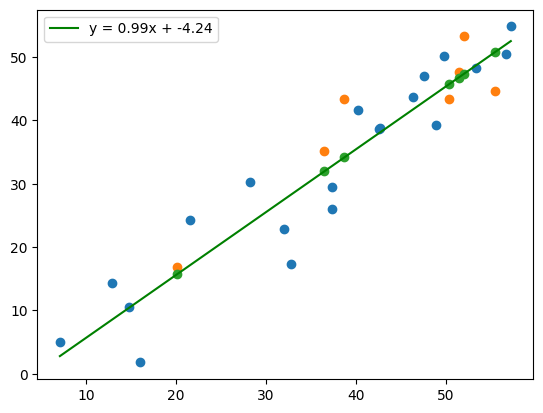

In [98]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.scatter(X_test, output)

a = lr.coef_[0]
b = lr.intercept_

x_all = np.array(x) if not isinstance(x, np.ndarray) else x

x_line = np.linspace(x_all.min(), x_all.max(), 100)
y_line = a * x_line + b

plt.plot(x_line, y_line, color='green', label=f'y = {a:.2f}x + {b:.2f}')
plt.legend()
plt.show()


The blue dots represent the training data, the orange dots represent the test data, and the green dots represent the model’s predictions.

The linear regression model I developed produces the same coefficients and intercept values as the model from the scikit-learn library. This ensures that both models generate identical regression lines, resulting in the same predictions.